# Part A

In [1]:
# exploratory data analysis (eda)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset and display basic information
df = pd.read_csv("dataset/cardekho.csv")

print("first 5 rows of dataset:")
print(df.head())

print("\ndataset information:")
print(df.info())

first 5 rows of dataset:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3      

In [2]:
# # 2. compute summary statistics
# print("\nsummary statistics:")
print(df.describe())


              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04           19.418783   
std       4.044249   8.062534e+05  5.655055e+04            4.037145   
min    1983.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2011.000000   2.549990e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine        seats  
count  7907.000000  7907.000000  
mean   1458.625016     5.416719  
std     503.916303     0.959588  
min     624.000000     2.000000  
25%    1197.000000     5.000000  
50%    1248.000000     5.000000  
75%    1582.000000     5.000000  
max    3604.000000    14.000000  


In [3]:
# 3. check missing values
print("\nmissing values in each column:")
print(df.isnull().sum())

# check outliers using iqr method for numeric columns
print("\noutlier detection using iqr method:")
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


missing values in each column:
name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

outlier detection using iqr method:
year: 81 outliers
selling_price: 600 outliers
km_driven: 170 outliers
mileage(km/ltr/kg): 24 outliers
engine: 1183 outliers
seats: 1653 outliers


In [4]:
# 3.5 Drop missing values and let outliers stay
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce') # Convert max_power to numeric
df = df.dropna()
df = df.drop(['name'], axis=1)
df = pd.get_dummies(df, drop_first=True) # Convert categorical data to numeric
df_copy = df.copy()

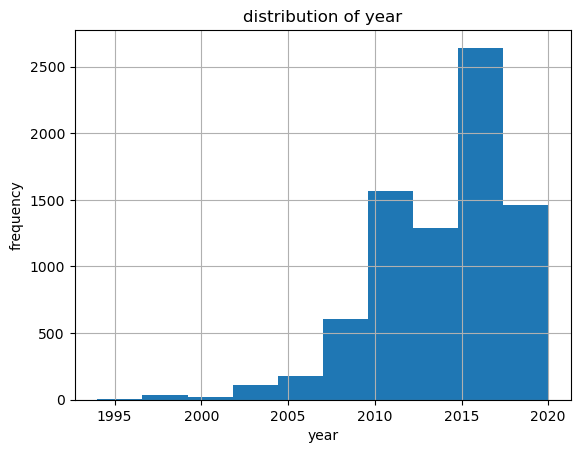

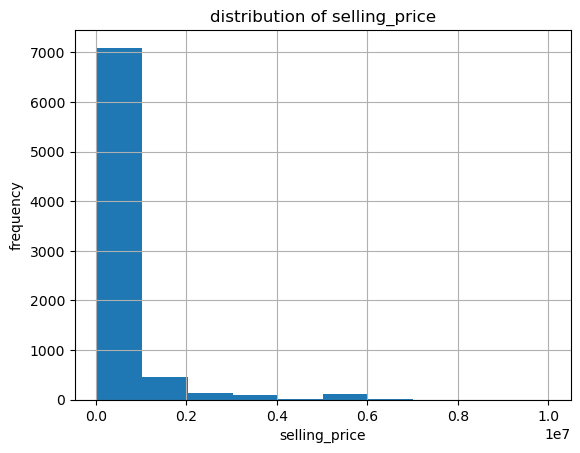

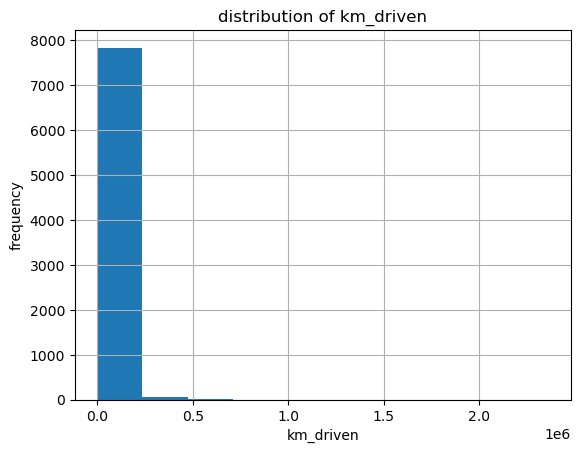

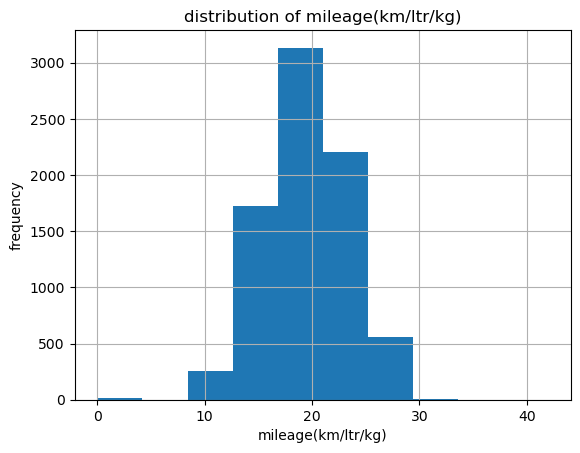

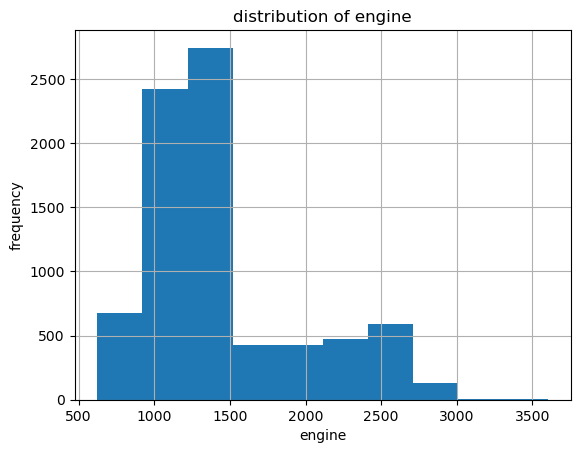

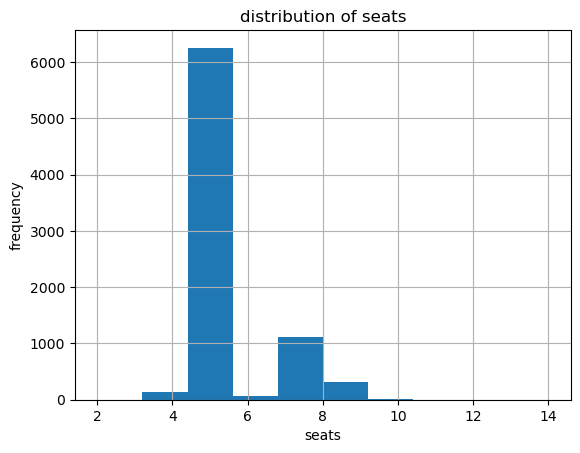

In [5]:
# 4. plot feature distributions (histograms)
for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f"distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

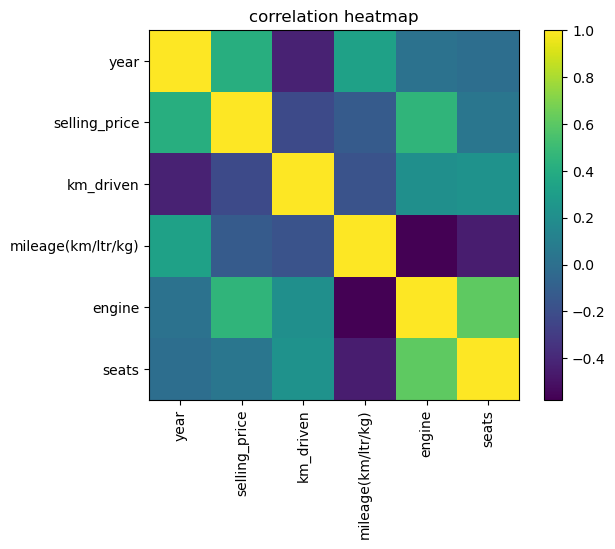

In [6]:
# correlation heatmap (for regression analysis)
plt.figure()
correlation_matrix = df[numeric_cols].corr()

plt.imshow(correlation_matrix)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("correlation heatmap")
plt.colorbar()
plt.show()

In [7]:

# show correlation with target variable
print("\ncorrelation with target (selling_price):")
print(correlation_matrix["selling_price"].sort_values(ascending=False))


correlation with target (selling_price):
selling_price         1.000000
engine                0.455682
year                  0.412302
seats                 0.041617
mileage(km/ltr/kg)   -0.126280
km_driven            -0.222158
Name: selling_price, dtype: float64


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage(km/ltr/kg)            7906 non-null   float64
 4   engine                        7906 non-null   float64
 5   max_power                     7906 non-null   float64
 6   seats                         7906 non-null   float64
 7   fuel_Diesel                   7906 non-null   bool   
 8   fuel_LPG                      7906 non-null   bool   
 9   fuel_Petrol                   7906 non-null   bool   
 10  seller_type_Individual        7906 non-null   bool   
 11  seller_type_Trustmark Dealer  7906 non-null   bool   
 12  transmission_Manual           7906 non-null   bool   
 13  owner_Fo

# Part B

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
X = df[['engine']]
y = df[['selling_price']]

print(f"\nDataset size: {len(df)} samples")


Dataset size: 7906 samples


In [11]:
# Feature scaling

X = X/X.max()
X = X.values.flatten()

y = y/y.max()
# y = y.values.flatten()
y = y.values.reshape(-1, 1)


In [12]:
# Adding 1's column to X so that we can do matrix multiplication, this will basically represent the variable attached with the intercept
# y = mx + cz (z=1 here, and that is what this column will be)

n_rows = len(y)
X = np.c_[np.ones(n_rows), X]
print(X)

# This will hold our final thetas, intercept and slope
theta = np.zeros((2, 1))

[[1.         0.34628191]
 [1.         0.41564928]
 [1.         0.41537181]
 ...
 [1.         0.34628191]
 [1.         0.38734739]
 [1.         0.38734739]]


In [13]:
# Actual loop
epochs = 80000
learning_rate = 0.01
m = n_rows # No. of rows
costs = []

for i in range(epochs):
    h = X @ theta

    error = h - y
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X.T @ error)

    # Updating theta now
    theta = theta - learning_rate * gradient

print(gradient)

[[ 2.51405060e-09]
 [-6.10734211e-09]]


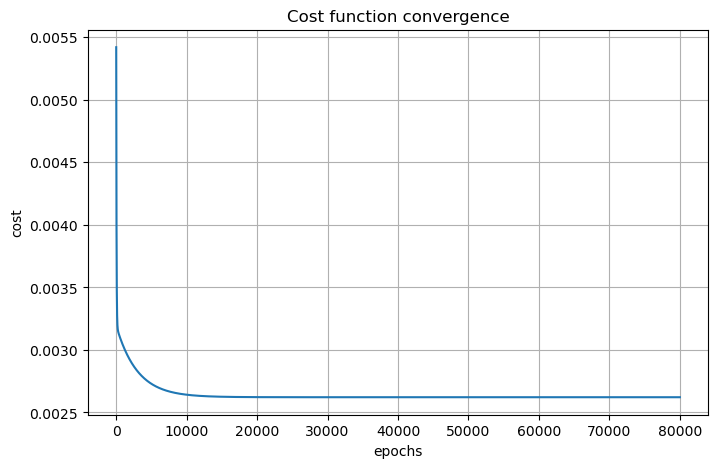

In [14]:
# Plotting epochs vs cost function
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

Slope = 0.265
Intercept = -0.042


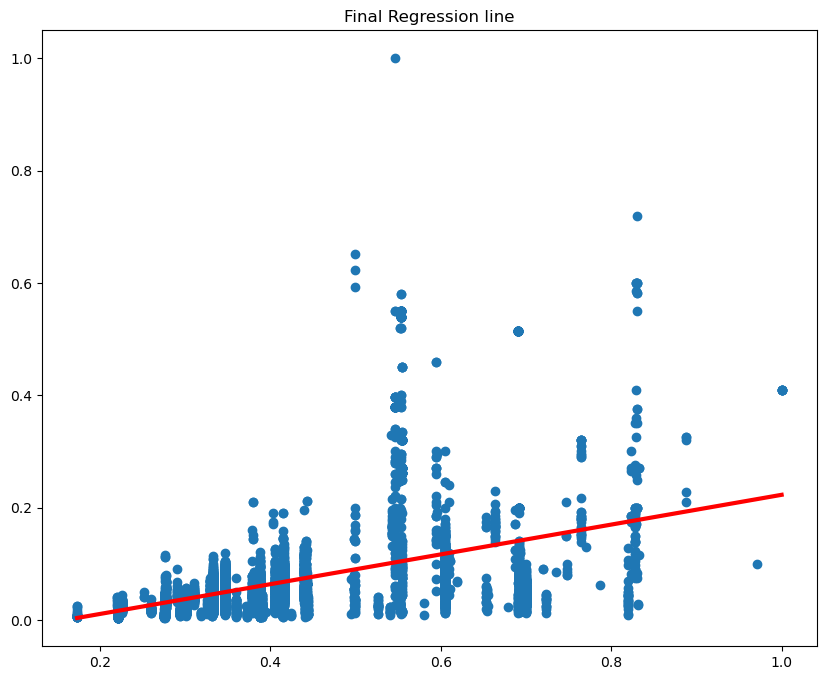

In [15]:
# The actual regression line
plt.figure(figsize=(10,8))

line_x = np.linspace(min(X[:, 1]), max(X[:, 1]), 300)
line_y = theta[0].item() + theta[1].item() * line_x

plt.scatter(X[:, 1], y)
plt.plot(line_x, line_y, color='red', linewidth=3)
plt.title('Final Regression line')

slope = (line_y[1] - line_y[0])/(line_x[1] - line_x[0])
print(f'Slope = {slope:.03f}')
print(f'Intercept = {theta[0].item():.3f}')

plt.show()

# Part C

In [16]:
X = df.drop(['selling_price'], axis=1)
y = df[['selling_price']]

In [17]:
# Feature scaling
X_original = X.copy()  # Keep original for coefficient interpretation
X_max = X.max()
y_max = y.max()

X = X / X_max
X = X.values

y = y / y_max
y = y.values.reshape(-1, 1)

In [18]:
np.random.seed(42)
p = np.random.permutation(len(y))
split = int(0.8 * len(y))
print(p)
X_train, X_test = X[p[:split]], X[p[split:]]
y_train, y_test = y[p[:split]], y[p[split:]]
print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")


[3641 5531 3524 ...  860 7603 7270]
Training samples: 6324 | Test samples: 1582


In [ ]:
# Adding 1's column for intercept
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize theta - 1 intercept + all features
n_features = X_train.shape[1]
theta = np.zeros((n_features, 1))
print(f"\nInitialized theta with {n_features} parameters")

In [41]:
# Gradient descent (training on training set only)
epochs = 500
learning_rate = 0.01
m = len(y_train)
costs = []

for i in range(epochs):
    h = X_train @ theta
    error = h - y_train
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X_train.T @ error)
    theta = theta - learning_rate * gradient

print(f"Final theta: {theta.flatten()}")

Final theta: [np.float64(0.02145906572150996) np.float64(0.027667208117760925)
 np.float64(-0.0533340856815102) np.float64(0.06302394751910023)
 np.float64(0.0996415391684841) np.float64(0.30671223687125093)
 np.float64(-0.04858741210028463) np.float64(-0.0011562495693242672)
 np.float64(0.007164542260442432) np.float64(-0.005574572531386691)
 np.float64(-0.0357783907041998) np.float64(-0.04641770218152628)
 np.float64(-0.07242057700453057) np.float64(-0.02409330988211198)
 np.float64(-0.017751845627741018) np.float64(0.04404269830986384)
 np.float64(-0.021885187789217126)]


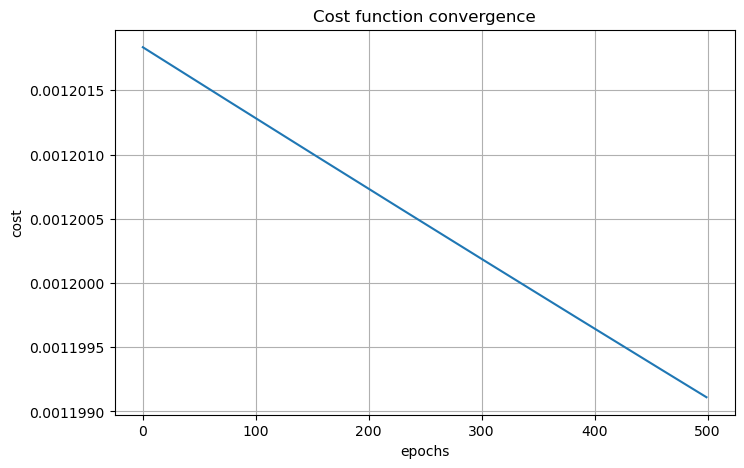

In [42]:
# Cost convergence plot
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

### Coefficients

In [43]:
column_names = X_original.columns.tolist()
for i, value in enumerate(theta.flatten()):
    label = " (Intercept)" if i == 0 else f" ({column_names[i-1]})"
    print(f"theta_{i} = {value:12.6f} {label}")

theta_0 =     0.021459  (Intercept)
theta_1 =     0.027667  (year)
theta_2 =    -0.053334  (km_driven)
theta_3 =     0.063024  (mileage(km/ltr/kg))
theta_4 =     0.099642  (engine)
theta_5 =     0.306712  (max_power)
theta_6 =    -0.048587  (seats)
theta_7 =    -0.001156  (fuel_Diesel)
theta_8 =     0.007165  (fuel_LPG)
theta_9 =    -0.005575  (fuel_Petrol)
theta_10 =    -0.035778  (seller_type_Individual)
theta_11 =    -0.046418  (seller_type_Trustmark Dealer)
theta_12 =    -0.072421  (transmission_Manual)
theta_13 =    -0.024093  (owner_Fourth & Above Owner)
theta_14 =    -0.017752  (owner_Second Owner)
theta_15 =     0.044043  (owner_Test Drive Car)
theta_16 =    -0.021885  (owner_Third Owner)


### MSE, RMSE, R2

In [44]:
def evaluate_model(X, y, theta, y_max, label):
    # 1. Predictions and Rescaling
    y_max_val = y_max.item() if hasattr(y_max, 'item') else y_max
    y_pred = (X @ theta) * y_max_val
    y_true = y * y_max_val
    
    # 2. Calculate Metrics
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    
    # 3. R-Squared calculation
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # 4. Print results
    print(f"\n--- {label} METRICS ---")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²:   {r2:.4f} ({r2*100:.2f}%)")
    
    # RETURN EVERYTHING: metrics + the actual arrays for plotting
    return rmse, r2, y_true, y_pred

# Now you can evaluate both in just two lines:
rmse_train, r2_train, y_actual_train, y_pred_train = evaluate_model(X_train, y_train, theta, y_max, "TRAINING")
rmse_test, r2_test, y_actual_test, y_pred_test = evaluate_model(X_test, y_test, theta, y_max, "TEST")

# Simple comparison
print(f"\nGeneralization Gap (R²): {(r2_train - r2_test)*100:.2f}%")


--- TRAINING METRICS ---
RMSE: 489,715.22
R²:   0.6325 (63.25%)

--- TEST METRICS ---
RMSE: 501,310.66
R²:   0.6403 (64.03%)

Generalization Gap (R²): -0.77%


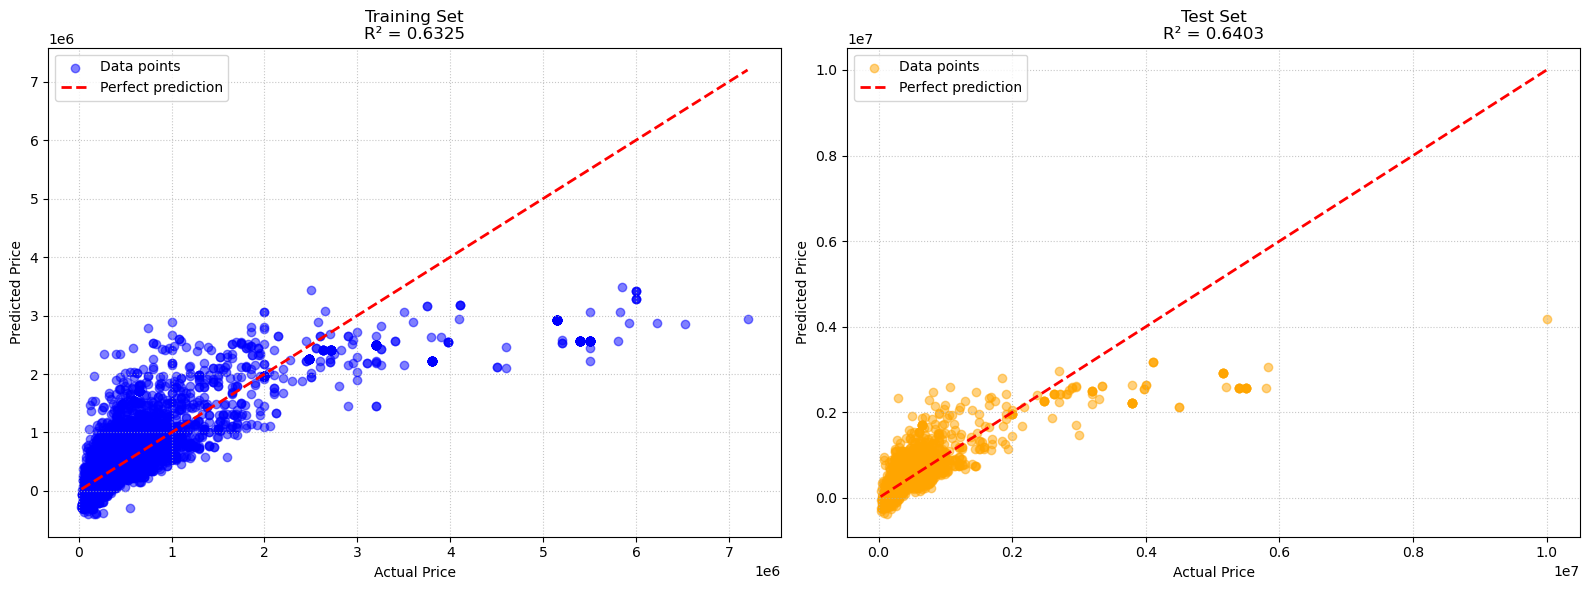

In [46]:
def plot_results(ax, y_true, y_pred, title, color, r2):
    # 1. Scatter plot of data
    ax.scatter(y_true, y_pred, alpha=0.5, color=color, label='Data points')
    
    # 2. Diagonal "Perfect Prediction" line
    limits = [y_true.min(), y_true.max()]
    ax.plot(limits, limits, 'r--', linewidth=2, label='Perfect prediction')
    
    # 3. Formatting
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{title}\nR² = {r2:.4f}')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend()

# Main Plotting Code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_results(ax1, y_actual_train, y_pred_train, "Training Set", "blue", r2_train)
plot_results(ax2, y_actual_test, y_pred_test, "Test Set", "orange", r2_test)

plt.tight_layout()
plt.show()

# Part D

In [76]:
X = df.drop(['selling_price'], axis=1)
y = df[['selling_price']]

### Adding features of higher power

In [77]:
X_num = df[['year', 'engine', 'max_power', 'km_driven']].values
X_squared = X_num**2
X_final = np.hstack((X.values, X_squared))
X = X_final

In [78]:
# Feature scaling
X_original = X.copy()  # Keep original for coefficient interpretation
X_max = X.max(axis=0) # Scale each feature independently
y_max = y.max()

X = X / X_max
# X = X.values

y = y / y_max
y = y.values.reshape(-1, 1)


In [79]:
np.random.seed(42)
p = np.random.permutation(len(y))
split = int(0.8 * len(y))
print(p)
X_train, X_test = X[p[:split]], X[p[split:]]
y_train, y_test = y[p[:split]], y[p[split:]]
print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")

[3641 5531 3524 ...  860 7603 7270]
Training samples: 6324 | Test samples: 1582


In [80]:
# Adding 1's column for intercept
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize theta - 1 intercept + all features
n_features = X_train.shape[1]
theta = np.zeros((n_features, 1))
print(f"\nInitialized theta with {n_features} parameters")


Initialized theta with 21 parameters


In [86]:
# Gradient descent (training on training set only)
epochs = 1000
learning_rate = 0.01
m = len(y_train)
costs = []

for i in range(epochs):
    h = X_train @ theta
    error = h - y_train
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X_train.T @ error)
    theta = theta - learning_rate * gradient

print(f"Final theta: {theta.flatten()}")

Final theta: [0.035315471814596475 0.035842313996271906 -0.0043207351831284395
 0.010905728798851646 0.04556554930819156 0.05474794336795965
 0.00964319693951131 0.027907897670264956 -0.00022570204136384555
 0.007283337838777106 -0.03886667456515114 -0.006087028179291223
 -0.08147319631755903 -0.008079276753191117 -0.020653849442944794
 0.0037090902555705816 -0.016828611452467494 0.03636574052595359
 0.037135542894812246 0.03420974405793866 -0.0002084478767743984]


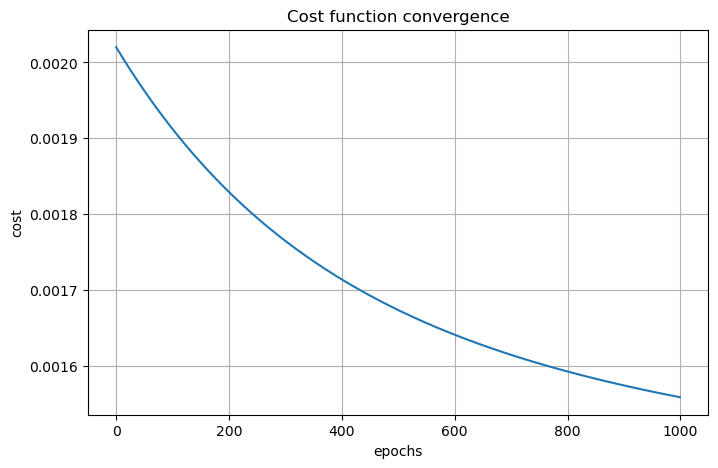

In [87]:
# Cost convergence plot
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

### Coefficients

In [88]:
# Fixed column names logic
original_cols = df.drop(['selling_price'], axis=1).columns.tolist()
squared_cols = [f"{col}^2" for col in ['year', 'engine', 'max_power', 'km_driven']]
column_names = original_cols + squared_cols

for i, value in enumerate(theta.flatten()):
    label = " (Intercept)" if i == 0 else f" ({column_names[i-1]})"
    print(f"theta_{i} = {value:12.6f} {label}")


theta_0 =     0.035315  (Intercept)
theta_1 =     0.035842  (year)
theta_2 =    -0.004321  (km_driven)
theta_3 =     0.010906  (mileage(km/ltr/kg))
theta_4 =     0.045566  (engine)
theta_5 =     0.054748  (max_power)
theta_6 =     0.009643  (seats)
theta_7 =     0.027908  (fuel_Diesel)
theta_8 =    -0.000226  (fuel_LPG)
theta_9 =     0.007283  (fuel_Petrol)
theta_10 =    -0.038867  (seller_type_Individual)
theta_11 =    -0.006087  (seller_type_Trustmark Dealer)
theta_12 =    -0.081473  (transmission_Manual)
theta_13 =    -0.008079  (owner_Fourth & Above Owner)
theta_14 =    -0.020654  (owner_Second Owner)
theta_15 =     0.003709  (owner_Test Drive Car)
theta_16 =    -0.016829  (owner_Third Owner)
theta_17 =     0.036366  (year^2)
theta_18 =     0.037136  (engine^2)
theta_19 =     0.034210  (max_power^2)
theta_20 =    -0.000208  (km_driven^2)


### MSE, RMSE, R2

In [89]:
def evaluate_model(X, y, theta, y_max, label):
    # 1. Predictions and Rescaling
    y_max_val = y_max.item() if hasattr(y_max, 'item') else y_max
    y_pred = (X @ theta) * y_max_val
    y_true = y * y_max_val
    
    # 2. Calculate Metrics
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    
    # 3. R-Squared calculation
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # 4. Print results
    print(f"\n--- {label} METRICS ---")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²:   {r2:.4f} ({r2*100:.2f}%)")
    
    # RETURN EVERYTHING: metrics + the actual arrays for plotting
    return rmse, r2, y_true, y_pred

# Now you can evaluate both in just two lines:
rmse_train, r2_train, y_actual_train, y_pred_train = evaluate_model(X_train, y_train, theta, y_max, "TRAINING")
rmse_test, r2_test, y_actual_test, y_pred_test = evaluate_model(X_test, y_test, theta, y_max, "TEST")

# Simple comparison
print(f"\nGeneralization Gap (R²): {(r2_train - r2_test)*100:.2f}%")


--- TRAINING METRICS ---
RMSE: 558,219.30
R²:   0.5225 (52.25%)

--- TEST METRICS ---
RMSE: 581,272.85
R²:   0.5163 (51.63%)

Generalization Gap (R²): 0.62%


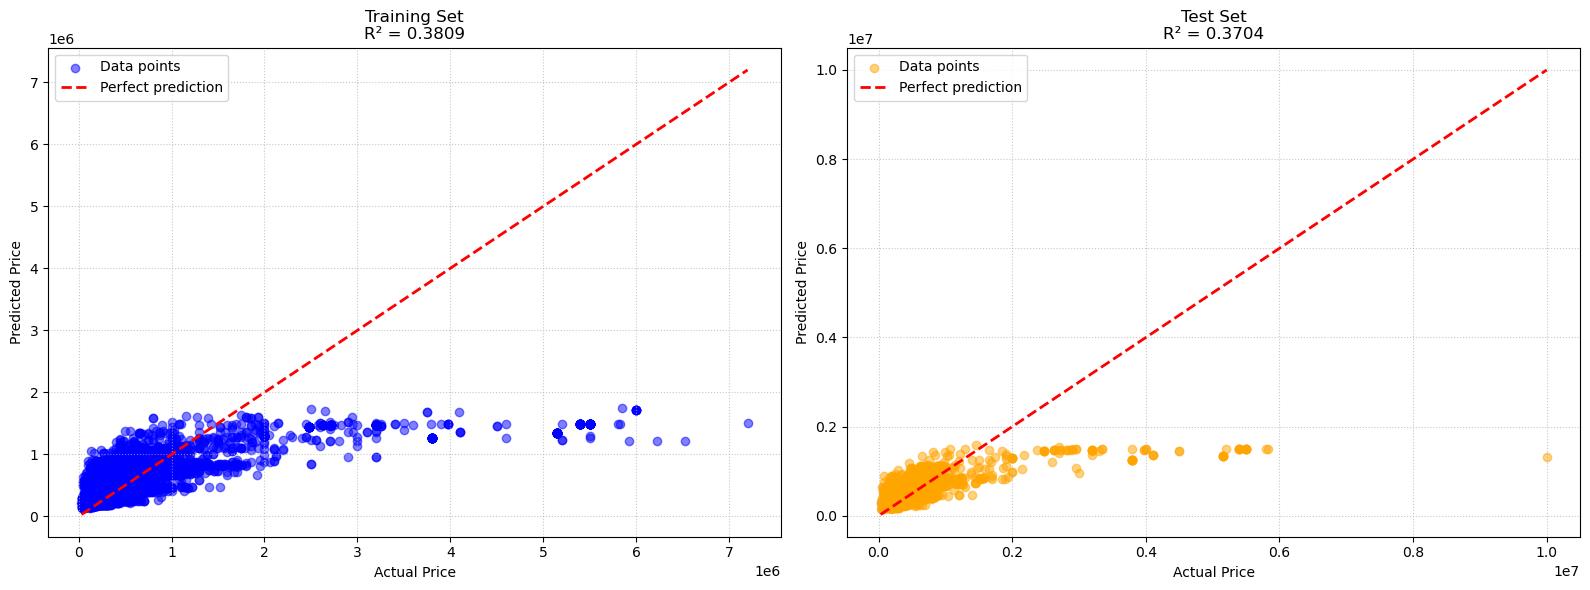

In [ ]:
def plot_results(ax, y_true, y_pred, title, color, r2):
    # 1. Scatter plot of data
    ax.scatter(y_true, y_pred, alpha=0.5, color=color, label='Data points')
    
    # 2. Diagonal "Perfect Prediction" line
    limits = [y_true.min(), y_true.max()]
    ax.plot(limits, limits, 'r--', linewidth=2, label='Perfect prediction')
    
    # 3. Formatting
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{title}\nR² = {r2:.4f}')
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.legend()

# Main Plotting Code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_results(ax1, y_actual_train, y_pred_train, "Training Set", "blue", r2_train)
plot_results(ax2, y_actual_test, y_pred_test, "Test Set", "orange", r2_test)

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CarDekho dataset
df = pd.read_csv("dataset/cardekho.csv")

# Data Cleaning: drop rows with missing values in key columns
df = df.dropna(subset=['selling_price', 'max_power', 'engine', 'year', 'km_driven', 'mileage(km/ltr/kg)'])

# Ensure numeric types
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['mileage(km/ltr/kg)'] = pd.to_numeric(df['mileage(km/ltr/kg)'], errors='coerce')
df = df.dropna(subset=['max_power', 'engine', 'mileage(km/ltr/kg)'])

print(f"Dataset loaded: {df.shape[0]} samples, {df.shape[1]} columns")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded: 7906 samples, 12 columns
Columns: ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

First 5 rows:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [5]:

# Helper functions 


def create_polynomial_features(X, degree):
    """Create polynomial features [1, X, X^2, ..., X^degree]"""
    n = len(X)
    X_poly = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X ** d
    return X_poly

def polynomial_regression_fit(X, y, degree):
    """Fit using Normal Equation: θ = (X^T X)^(-1) X^T y"""
    X_poly = create_polynomial_features(X, degree)
    XtX = np.dot(X_poly.T, X_poly)
    Xty = np.dot(X_poly.T, y)
    XtX += np.eye(degree + 1) * 1e-8  # small regularization
    theta = np.linalg.solve(XtX, Xty)
    return theta

def polynomial_predict(X, theta):
    """Predict using polynomial coefficients"""
    degree = len(theta) - 1
    X_poly = create_polynomial_features(X, degree)
    return np.dot(X_poly, theta)

def calculate_metrics(y_true, y_pred):
    """Calculate MAE, MSE, RMSE, R²"""
    n = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred)) / n
    mse = np.sum((y_true - y_pred) ** 2) / n
    rmse = np.sqrt(mse)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return mae, mse, rmse, r2

# ============================================================
# Build all 3 models for diagnostics (CarDekho dataset)
# ============================================================

# --- Feature & Target ---
X_hp = df["max_power"].values        # max_power as the single feature (like horsepower)
y = df["selling_price"].values        # selling_price is the target

# Normalize max_power
X_mean = np.mean(X_hp)
X_std = np.std(X_hp)
X_normalized = (X_hp - X_mean) / X_std

# Train-test split (80-20)
np.random.seed(42)
indices = np.random.permutation(len(X_normalized))
split_idx = int(0.8 * len(X_normalized))

X_train = X_normalized[indices[:split_idx]]
X_test = X_normalized[indices[split_idx:]]
y_train = y[indices[:split_idx]]
y_test = y[indices[split_idx:]]

# --- Model 1: Simple Linear Regression (degree=1) ---
theta_linear = polynomial_regression_fit(X_train, y_train, degree=1)
y_pred_train_linear = polynomial_predict(X_train, theta_linear)
y_pred_test_linear = polynomial_predict(X_test, theta_linear)

# --- Model 2: Polynomial Regression (degree=2) ---
theta_poly2 = polynomial_regression_fit(X_train, y_train, degree=2)
y_pred_train_poly2 = polynomial_predict(X_train, theta_poly2)
y_pred_test_poly2 = polynomial_predict(X_test, theta_poly2)

# --- Model 3: Multiple Linear Regression ---
numeric_features = ['year', 'engine', 'max_power', 'km_driven', 'mileage(km/ltr/kg)']
X_multi = df[numeric_features].values
y_multi = df["selling_price"].values

# Normalize features
X_multi_mean = np.mean(X_multi, axis=0)
X_multi_std = np.std(X_multi, axis=0)
X_multi_norm = (X_multi - X_multi_mean) / X_multi_std

# Add intercept column
X_multi_norm = np.c_[np.ones(len(X_multi_norm)), X_multi_norm]

# Train-test split
X_multi_train = X_multi_norm[indices[:split_idx]]
X_multi_test = X_multi_norm[indices[split_idx:]]
y_multi_train = y_multi[indices[:split_idx]]
y_multi_test = y_multi[indices[split_idx:]]

# Fit using Normal Equation
XtX = X_multi_train.T @ X_multi_train + np.eye(X_multi_train.shape[1]) * 1e-8
Xty = X_multi_train.T @ y_multi_train
theta_multi = np.linalg.solve(XtX, Xty)

y_pred_train_multi = X_multi_train @ theta_multi
y_pred_test_multi = X_multi_test @ theta_multi

print("All 3 models fitted successfully on CarDekho dataset!")
print(f"\nModel 1 - Simple Linear Regression (max_power only)")
print(f"  Train R²: {calculate_metrics(y_train, y_pred_train_linear)[3]:.4f}")
print(f"  Test  R²: {calculate_metrics(y_test, y_pred_test_linear)[3]:.4f}")

print(f"\nModel 2 - Polynomial Regression (degree=2)")
print(f"  Train R²: {calculate_metrics(y_train, y_pred_train_poly2)[3]:.4f}")
print(f"  Test  R²: {calculate_metrics(y_test, y_pred_test_poly2)[3]:.4f}")

print(f"\nModel 3 - Multiple Linear Regression ({len(numeric_features)} features: {numeric_features})")
print(f"  Train R²: {calculate_metrics(y_multi_train, y_pred_train_multi)[3]:.4f}")
print(f"  Test  R²: {calculate_metrics(y_multi_test, y_pred_test_multi)[3]:.4f}")

All 3 models fitted successfully on CarDekho dataset!

Model 1 - Simple Linear Regression (max_power only)
  Train R²: 0.5573
  Test  R²: 0.5794

Model 2 - Polynomial Regression (degree=2)
  Train R²: 0.6336
  Test  R²: 0.6383

Model 3 - Multiple Linear Regression (5 features: ['year', 'engine', 'max_power', 'km_driven', 'mileage(km/ltr/kg)'])
  Train R²: 0.6304
  Test  R²: 0.6591


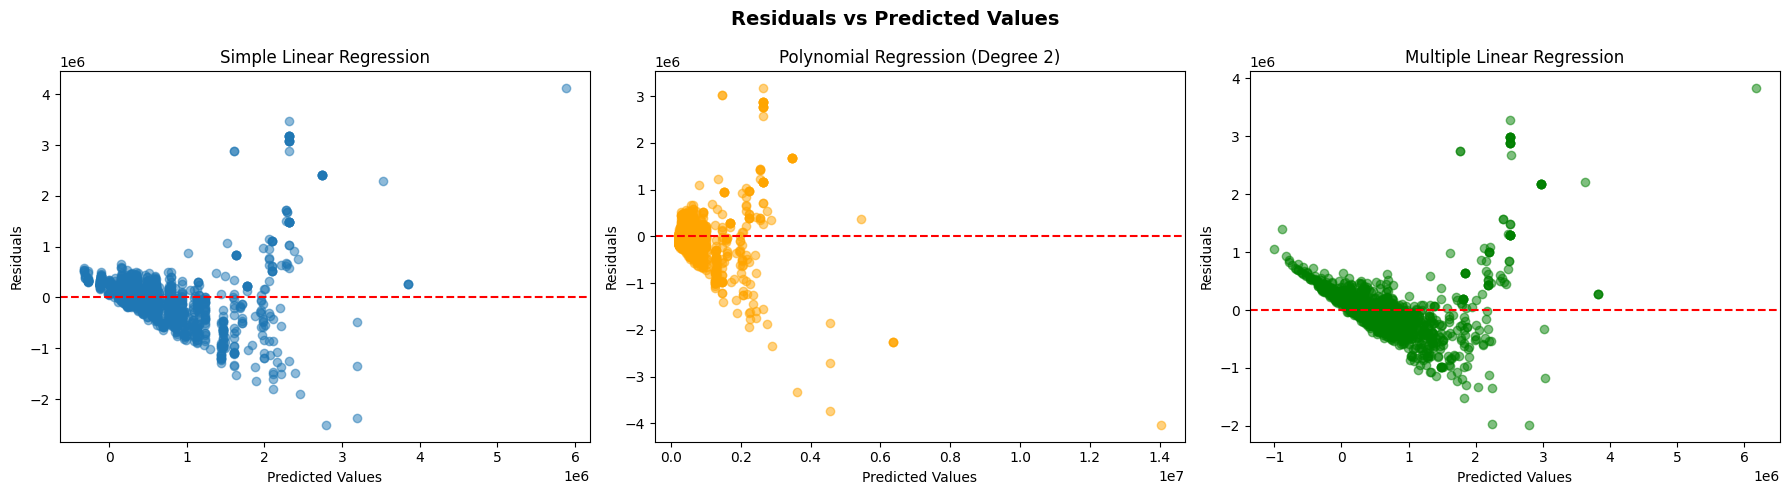


Mean of Residuals:
  Simple Linear:  5864.04
  Polynomial:     865.04
  Multiple Linear:-927.10
(Mean should be close to 0)


In [6]:
# Residuals vs Predicted Values

# calculate residuals for all 3 models
residuals_linear = y_test - y_pred_test_linear
residuals_poly2 = y_test - y_pred_test_poly2
residuals_multi = y_multi_test - y_pred_test_multi

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# simple linear regression
axes[0].scatter(y_pred_test_linear, residuals_linear, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Simple Linear Regression')

# polynomial regression
axes[1].scatter(y_pred_test_poly2, residuals_poly2, alpha=0.5, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Polynomial Regression (Degree 2)')

# multiple linear regression
axes[2].scatter(y_pred_test_multi, residuals_multi, alpha=0.5, color='green')
axes[2].axhline(y=0, color='red', linestyle='--')
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Multiple Linear Regression')

plt.suptitle('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# print mean of residuals
print("\nMean of Residuals:")
print(f"  Simple Linear:  {np.mean(residuals_linear):.2f}")
print(f"  Polynomial:     {np.mean(residuals_poly2):.2f}")
print(f"  Multiple Linear:{np.mean(residuals_multi):.2f}")
print("(Mean should be close to 0)")

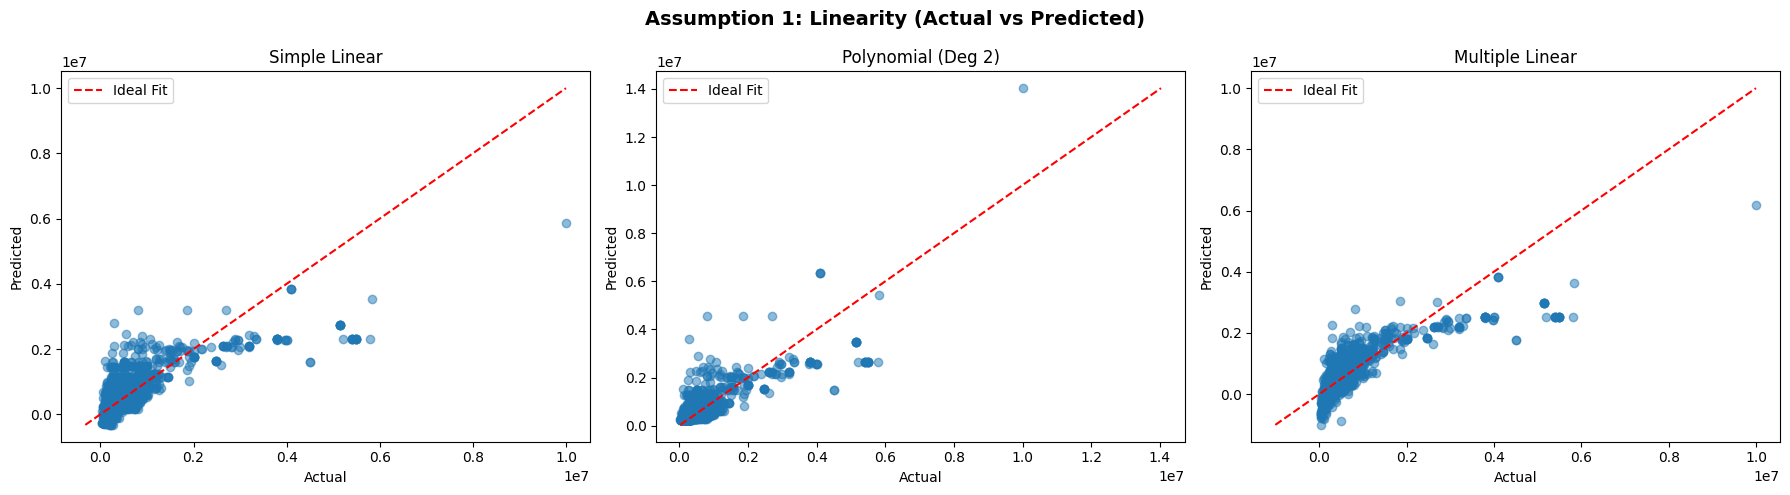

If points follow the red line, linearity assumption is satisfied.



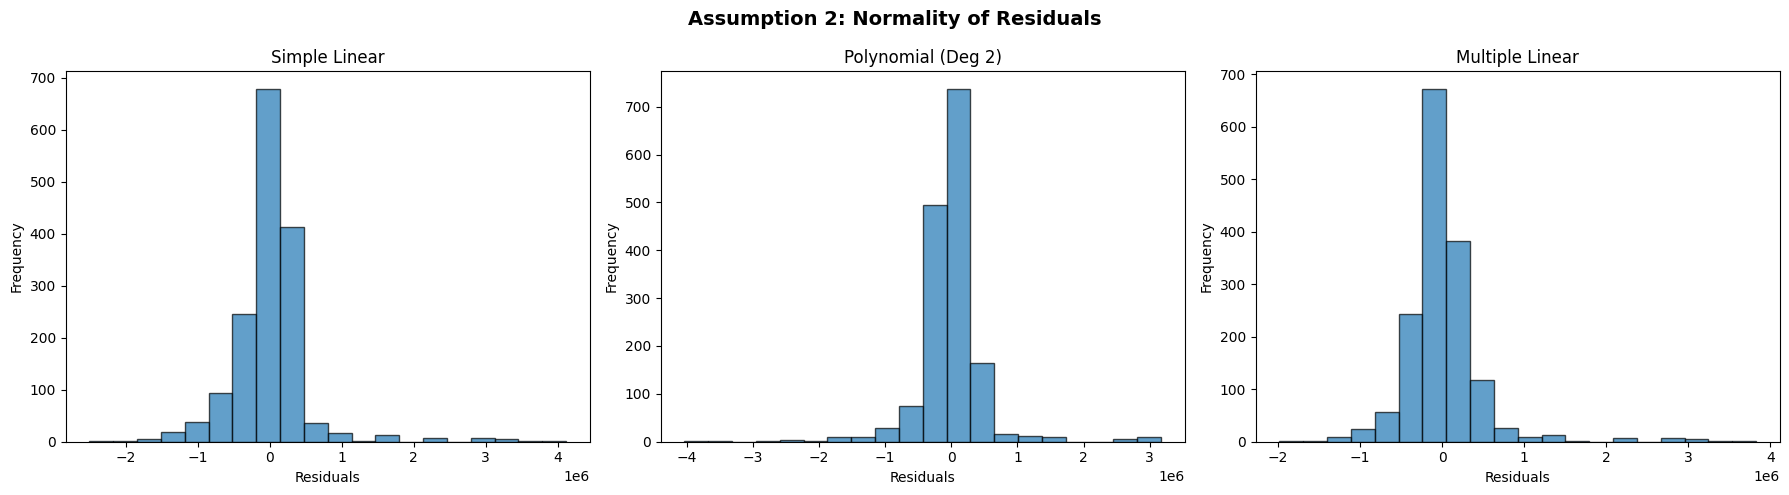

If histogram looks bell-shaped, normality assumption is satisfied.

Assumption 3: Homoscedasticity
Already checked in residuals vs predicted plot above.
If residuals are evenly spread (no funnel shape), assumption holds.

Assumption 4: Independence of Residuals (Durbin-Watson Test)
-------------------------------------------------------
  Simple Linear: DW = 2.0654 → No autocorrelation
  Polynomial (Deg 2): DW = 2.0603 → No autocorrelation
  Multiple Linear: DW = 2.0921 → No autocorrelation

(DW close to 2 means residuals are independent)

SUMMARY OF REGRESSION ASSUMPTIONS
1. Linearity       → Check Actual vs Predicted plot
2. Normality        → Check histogram of residuals
3. Homoscedasticity → Check residuals vs predicted plot
4. Independence     → Check Durbin-Watson statistic


In [7]:
# Validate Regression Assumptions

models = [
    ("Simple Linear", y_test, y_pred_test_linear, residuals_linear),
    ("Polynomial (Deg 2)", y_test, y_pred_test_poly2, residuals_poly2),
    ("Multiple Linear", y_multi_test, y_pred_test_multi, residuals_multi)
]

# --- Assumption 1: Linearity (Actual vs Predicted) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, y_act, y_pred, _) in enumerate(models):
    axes[i].scatter(y_act, y_pred, alpha=0.5)
    min_val = min(y_act.min(), y_pred.min())
    max_val = max(y_act.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(name)
    axes[i].legend()
plt.suptitle('Assumption 1: Linearity (Actual vs Predicted)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print("If points follow the red line, linearity assumption is satisfied.\n")

# --- Assumption 2: Normality of Residuals (Histogram) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, _, _, res) in enumerate(models):
    axes[i].hist(res, bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel('Residuals')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(name)
plt.suptitle('Assumption 2: Normality of Residuals', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print("If histogram looks bell-shaped, normality assumption is satisfied.\n")

# --- Assumption 3: Homoscedasticity (Residuals vs Predicted) ---
print("Assumption 3: Homoscedasticity")
print("Already checked in residuals vs predicted plot above.")
print("If residuals are evenly spread (no funnel shape), assumption holds.\n")

# --- Assumption 4: Independence (Durbin-Watson Test) ---
print("Assumption 4: Independence of Residuals (Durbin-Watson Test)")
print("-" * 55)
for name, _, _, res in models:
    dw = np.sum(np.diff(res)**2) / np.sum(res**2)
    if 1.5 < dw < 2.5:
        result = "No autocorrelation"
    elif dw <= 1.5:
        result = "Positive autocorrelation"
    else:
        result = "Negative autocorrelation"
    print(f"  {name}: DW = {dw:.4f} → {result}")
print("\n(DW close to 2 means residuals are independent)")

# --- Summary ---
print("\n" + "=" * 55)
print("SUMMARY OF REGRESSION ASSUMPTIONS")
print("=" * 55)
print("1. Linearity       → Check Actual vs Predicted plot")
print("2. Normality        → Check histogram of residuals")
print("3. Homoscedasticity → Check residuals vs predicted plot")
print("4. Independence     → Check Durbin-Watson statistic")